# Pré-processamento simples

In [1]:
import nbimporter
import numpy as np
import Convert_NRC as nrc
from header import EmotionAnalysis as ea

Importing Jupyter notebook from Convert_NRC.ipynb
Importing Jupyter notebook from /home/ellen/Projetos/TextMining/header/EmotionAnalysis.ipynb


## Obtenção do documento

In [2]:
filepath = 'books/senhora.txt'

In [3]:
raw = ea.open_file(filepath)

## Pré-processamento

In [4]:
stopwords = ea.get_stopwords()

In [5]:
tokens = ea.tokenize(raw)

In [6]:
no_stop_tokens = ea.remove_stopwords(stopwords, tokens)

In [7]:
filtered_tokens = ea.remove_not_alpha(no_stop_tokens)

In [8]:
text = ea.convert_to_text(tokens)

## Análise do texto

In [9]:
dist = ea.tokens_frequency(filtered_tokens)
dist

FreqDist({'aurélia': 623, 'seixas': 457, 'é': 397, 'moça': 270, 'marido': 216, 'ainda': 168, 'mulher': 167, 'casa': 144, 'havia': 137, 'fernando': 131, ...})

In [17]:
sortedToken = sorted(list(set(filtered_tokens)), key=lambda token: dist[token], reverse=True)

In [22]:
[{'text': token, 'size': dist[token]} for token in sortedToken[:150]]

[{'text': 'aurélia', 'size': 623},
 {'text': 'seixas', 'size': 457},
 {'text': 'é', 'size': 397},
 {'text': 'moça', 'size': 270},
 {'text': 'marido', 'size': 216},
 {'text': 'ainda', 'size': 168},
 {'text': 'mulher', 'size': 167},
 {'text': 'casa', 'size': 144},
 {'text': 'havia', 'size': 137},
 {'text': 'fernando', 'size': 131},
 {'text': 'amor', 'size': 121},
 {'text': 'disse', 'size': 116},
 {'text': 'senhor', 'size': 111},
 {'text': 'lemos', 'size': 111},
 {'text': 'tempo', 'size': 110},
 {'text': 'alma', 'size': 110},
 {'text': 'casamento', 'size': 109},
 {'text': 'noite', 'size': 109},
 {'text': 'senhora', 'size': 102},
 {'text': 'onde', 'size': 102},
 {'text': 'pois', 'size': 100},
 {'text': 'tão', 'size': 98},
 {'text': 'ser', 'size': 98},
 {'text': 'vez', 'size': 97},
 {'text': 'homem', 'size': 96},
 {'text': 'porém', 'size': 95},
 {'text': 'então', 'size': 94},
 {'text': 'sobre', 'size': 92},
 {'text': 'olhos', 'size': 90},
 {'text': 'sala', 'size': 90},
 {'text': 'bem', 'siz

In [10]:
ea.info(tokens, filtered_tokens)

quantidade de palavras: 88243
quantidade de palavras após o filtro: 38845
quantidade de palavras únicas: 12230
quantidade de palavras únicas após o filtro: 10311
diversidade léxica: 26.543956751190628


In [11]:
freq = ea.most_frequent(filtered_tokens, dist, 20)
print(f"20 palavras mais frequentes: {freq}")

20 palavras mais frequentes: [('aurélia', 623), ('seixas', 457), ('é', 397), ('moça', 270), ('marido', 216), ('ainda', 168), ('mulher', 167), ('casa', 144), ('havia', 137), ('fernando', 131), ('amor', 121), ('disse', 116), ('senhor', 111), ('lemos', 111), ('tempo', 110), ('alma', 110), ('noite', 109), ('casamento', 109), ('senhora', 102), ('onde', 102)]


### Análise de Emoção

In [12]:
wordList, emotionList = ea.emolex()

In [13]:
emoList = ea.newList(emotionList, filtered_tokens)

In [14]:
emotionCounts = ea.generate_count(wordList, filtered_tokens)

In [26]:
import copy
import numpy as np
from collections import defaultdict, Counter

def generate_count():
        labels = ['positivo', 'negativo', 'alegria', 'tristeza', 'nojo',
                  'antecipação', 'medo', 'surpresa', 'confiança', 'raiva']

        dataset = []
        temp_set = []
        emoCount = {}
        wordCount = {}
        
        for l in labels:
            temp = Counter(emoList[l])

            for key, val in temp.items():
                wordCount['name'] = key
                wordCount['value'] = val
                temp_set.append(copy.copy(wordCount))

            emoCount['name'] = l
            emoCount['children'] = temp_set
            dataset.append(copy.copy(emoCount))
            
        return 'var data = { "name": "emotion", "children":' + str(dataset) + '}'
print(generate_count())

var data = { "name": "emotion", "children":[{'name': 'positivo', 'children': [{'name': 'céu', 'value': 20}, {'name': 'estrela', 'value': 7}, {'name': 'ídolo', 'value': 5}, {'name': 'flor', 'value': 27}, {'name': 'alabastro', 'value': 2}, {'name': 'diamante', 'value': 2}, {'name': 'brilhante', 'value': 13}, {'name': 'verdade', 'value': 35}, {'name': 'mãe', 'value': 70}, {'name': 'emancipação', 'value': 2}, {'name': 'moça', 'value': 270}, {'name': 'firme', 'value': 7}, {'name': 'governar', 'value': 1}, {'name': 'tutor', 'value': 24}, {'name': 'maior', 'value': 45}, {'name': 'influência', 'value': 12}, {'name': 'geral', 'value': 12}, {'name': 'prêmio', 'value': 1}, {'name': 'vitória', 'value': 3}, {'name': 'sagacidade', 'value': 3}, {'name': 'admirável', 'value': 2}, {'name': 'beleza', 'value': 42}, {'name': 'sim', 'value': 18}, {'name': 'harmonia', 'value': 2}, {'name': 'riso', 'value': 10}, {'name': 'deus', 'value': 28}, {'name': 'inefável', 'value': 7}, {'name': 'ternura', 'value': 9},

In [27]:
wordCounts = generate_count()

In [32]:
def most_common_array():
        labels = ['positivo', 'negativo', 'alegria', 'tristeza', 'nojo',
                  'antecipação', 'medo', 'surpresa', 'confiança', 'raiva']

        emoCount = []

        for l in labels:
            # salva os 5 tokens mais comuns por emoção em uma lista
            emoCount.append(Counter(emoList[l]).most_common(5))

        # aplaina a lista
        flatList = [item for sublist in emoCount for item in sublist]

        # ordena a lista do maior para o menor
        sortedList = sorted(set(flatList), key=lambda tup: tup[1], reverse=True)
        print(sortedList)
        # retorna os 5 tokens mais comuns
        return [i[0] for i in sortedList[:5]]

In [33]:
wordArray = most_common_array()

[('moça', 270), ('amor', 121), ('senhor', 111), ('tempo', 110), ('casamento', 109), ('bem', 89), ('palavras', 76), ('mãe', 70), ('dinheiro', 49), ('menos', 46), ('viúva', 46), ('nada', 43), ('beleza', 42), ('sofá', 37), ('rua', 36), ('corte', 32), ('deus', 28), ('esperança', 23), ('doce', 22), ('força', 21), ('liberdade', 20), ('segredo', 20), ('boa', 20), ('surpresa', 19), ('cruel', 19), ('humilhação', 18), ('falta', 17)]


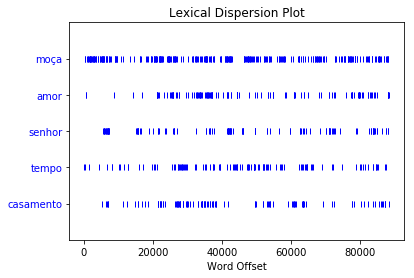

In [35]:
text.dispersion_plot(wordArray)

In [56]:
import matplotlib.pyplot as plt

def plot_dis():
    j = 1
    
    for WORD in wordArray:
        x = []
        for i in range(0,len(tokens)): # for every word in text
            if tokens[i] == WORD: # check if word is word we are searching for
                x.append(i) # if so, append its position to variable x

        fig, ax = plt.subplots()
        ax.vlines(x, 0, 1, edgecolor="red") # <-- ANSWER
        ax.set_xlim([0, len(tokens)]) # set the lower and upper limits of graph
        ax.set_xticks([0],minor=True) # turn off: ax.set_xticks([])
        ax.set_ylabel(WORD) # turn off by droping this line
        ax.set_yticks([])
        fig.set_figheight(1) # figure height, see also fig.set_figwidth()
        fig.savefig(f'img{j}.png')   # save the figure to file
        plt.close(fig)

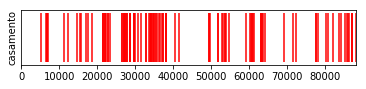

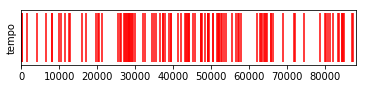

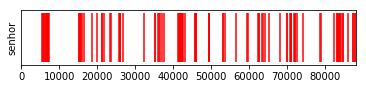

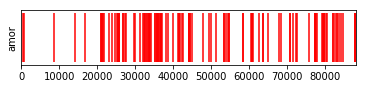

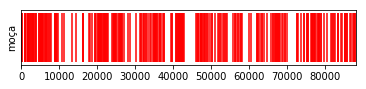

In [57]:
plot_dis()

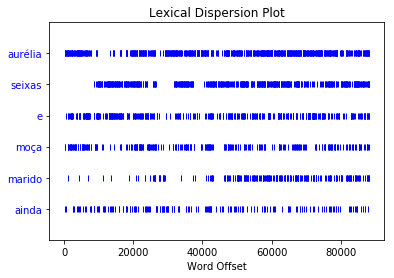

In [20]:
sortedToken = sorted(list(set(filtered_tokens)), key=lambda token: dist[token], reverse=True)
text.dispersion_plot(sortedToken[:6])